In [1]:
!pip install "modin[all]"
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 KB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 17.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.8/530.8 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 46.

In [1]:
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
!pip install --upgrade pandas


In [3]:
import modin.pandas as pd

In [4]:
df = pd.read_csv("Intel_hack_DS.csv")
df.head()

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-12-06 11:12:13,184	INFO worker.py:1673 -- Started a local Ray instance.


,Issue_ID,Issue_Description,Error_Message,System_Specs,Troubleshooting_Steps
0,1.0,Windows update failed to install,Error 0x80070005,Windows 10 Version 1903,1. Restart your PC and try updating again. 2. ...
1,2.0,Web pages not loading correctly in Chrome,NaN,Windows 10 Version 2004 Chrome Version 88.0.43...,1. Clear Chrome's cache and cookies. 2. Disabl...
2,3.0,Outlook crashes when sending email,Error 0xc0000005,Office 365 Windows 10 Version 1909,1. Check for updates and install if any availa...
3,4.0,Slow performance after Windows 10 update,NaN,Windows 10 Version 21H1,1. Check for the latest device drivers. 2. Adj...
4,5.0,Blue screen error on startup,SYSTEM_THREAD_EXCEPTION_NOT_HANDLED,Windows 10 Version 20H2,1. Boot in Safe Mode and uninstall recent upda...


In [5]:
def check_null_values(input_excel_file):
    # Load Excel file into a pandas DataFrame
    df = pd.read_csv(input_excel_file)

    # Display count of null values in each column
    null_counts = df.isnull().sum()
    print("Null values in each column:")
    print(null_counts)

# Example usage
input_excel_file = 'Intel_hack_DS.csv'  # Change this to your Excel file path

check_null_values(input_excel_file)


Null values in each column:
Issue_ID                 1490
Issue_Description           0
Error_Message            1762
System_Specs             1089
Troubleshooting_Steps      18
dtype: int64


In [6]:
#Data Summary:
summary = df.describe(include='all')
print(summary)


          Issue_ID                                  Issue_Description  \
count   618.000000                                               2108   
unique         NaN                                               1429   
top            NaN  File Share Access - [TICKET ID] - [NAME] ([COM...   
freq           NaN                                                 61   
mean    309.500000                                                NaN   
std     178.545512                                                NaN   
min       1.000000                                                NaN   
25%     155.250000                                                NaN   
50%     309.500000                                                NaN   
75%     463.750000                                                NaN   
max     618.000000                                                NaN   

           Error_Message             System_Specs  \
count                346                     1019   
unique           

In [7]:
#Missing Values:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Issue_ID                 1490
Issue_Description           0
Error_Message            1762
System_Specs             1089
Troubleshooting_Steps      18
dtype: int64


In [8]:
#Text Length
df['Issue_Description_Length'] = df['Issue_Description'].str.len()
df['Error_Message_Length'] = df['Error_Message'].str.len()
df['Troubleshooting_Steps_Length'] = df['Troubleshooting_Steps'].str.len()

length_metrics = df[['Issue_Description_Length', 'Error_Message_Length', 'Troubleshooting_Steps_Length']].describe()
print(length_metrics)


       Issue_Description_Length  Error_Message_Length  \
count               2108.000000            346.000000   
mean                  66.914137             20.023121   
std                   64.232276              6.334130   
min                    6.000000              8.000000   
25%                   41.000000             16.000000   
50%                   59.000000             19.000000   
75%                   71.000000             24.000000   
max                  646.000000             52.000000   

       Troubleshooting_Steps_Length  
count                   2090.000000  
mean                     192.381818  
std                      104.037151  
min                       21.000000  
25%                      120.250000  
50%                      177.000000  
75%                      241.750000  
max                      843.000000  


In [9]:
class_distribution = df['Issue_Description'].value_counts()
print("Class Distribution:")
print(class_distribution)


the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


Class Distribution:
Issue_Description
File Share Access - [TICKET ID] - [NAME] ([COMPANY]A. [LOCATION])          61
Shared Mailbox Access - [AWS_ACCESS_KEY] - [EMAIL]                         43
File Share Access - [TICKET ID] - [NAME] ([COMPANY]. [LOCATION])           25
Shared Mailbox Access - [ADDRESS] - [EMAIL]                                20
Shared Mailbox Access - [TICKET ID] - [EMAIL]                              18
                                                                           ..
Application Permissions Error                                               1
Application Print Dialog Not Responding                                     1
Application UI distorted                                                    1
Application Window Resizing Issue                                           1
Application becomes unresponsive when dealing with complex calculations     1
Name: count, Length: 1429, dtype: int64


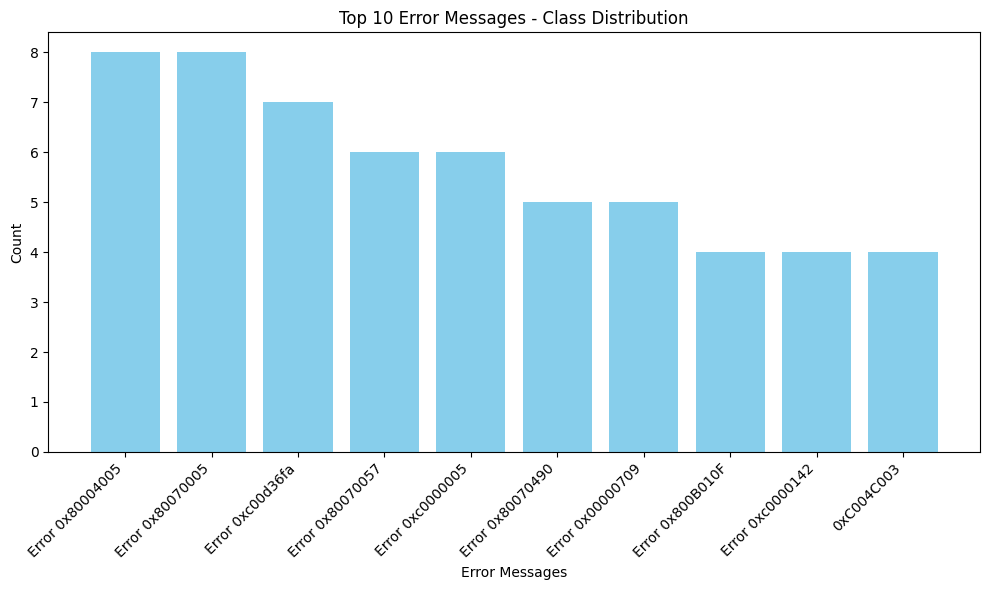

In [10]:
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df and 'Error_Message' is the column of interest
top_10_error_messages = df['Error_Message'].value_counts().head(10)

# Plotting the class distribution for the top 10 error messages
plt.figure(figsize=(10, 6))
plt.bar(top_10_error_messages.index, top_10_error_messages.values, color='skyblue')
plt.title('Top 10 Error Messages - Class Distribution')
plt.xlabel('Error Messages')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
df.head()

,Issue_ID,Issue_Description,Error_Message,System_Specs,Troubleshooting_Steps,Issue_Description_Length,Error_Message_Length,Troubleshooting_Steps_Length
0,1.0,Windows update failed to install,Error 0x80070005,Windows 10 Version 1903,1. Restart your PC and try updating again. 2. ...,32,16.0,181
1,2.0,Web pages not loading correctly in Chrome,NaN,Windows 10 Version 2004 Chrome Version 88.0.43...,1. Clear Chrome's cache and cookies. 2. Disabl...,41,NaN,202
2,3.0,Outlook crashes when sending email,Error 0xc0000005,Office 365 Windows 10 Version 1909,1. Check for updates and install if any availa...,34,16.0,163
3,4.0,Slow performance after Windows 10 update,NaN,Windows 10 Version 21H1,1. Check for the latest device drivers. 2. Adj...,40,NaN,194
4,5.0,Blue screen error on startup,SYSTEM_THREAD_EXCEPTION_NOT_HANDLED,Windows 10 Version 20H2,1. Boot in Safe Mode and uninstall recent upda...,28,35.0,167


In [12]:
# Assuming your data is in a DataFrame named df
df = df.drop('Issue_ID', axis=1)

# Now df does not have the 'Issue_ID' column


In [13]:
df.head()

,Issue_Description,Error_Message,System_Specs,Troubleshooting_Steps,Issue_Description_Length,Error_Message_Length,Troubleshooting_Steps_Length
0,Windows update failed to install,Error 0x80070005,Windows 10 Version 1903,1. Restart your PC and try updating again. 2. ...,32,16.0,181
1,Web pages not loading correctly in Chrome,NaN,Windows 10 Version 2004 Chrome Version 88.0.43...,1. Clear Chrome's cache and cookies. 2. Disabl...,41,NaN,202
2,Outlook crashes when sending email,Error 0xc0000005,Office 365 Windows 10 Version 1909,1. Check for updates and install if any availa...,34,16.0,163
3,Slow performance after Windows 10 update,NaN,Windows 10 Version 21H1,1. Check for the latest device drivers. 2. Adj...,40,NaN,194
4,Blue screen error on startup,SYSTEM_THREAD_EXCEPTION_NOT_HANDLED,Windows 10 Version 20H2,1. Boot in Safe Mode and uninstall recent upda...,28,35.0,167


In [14]:
# Assuming your data is in a DataFrame named df
columns_to_remove = ['Issue_Description_Length', 'Error_Message_Length', 'Troubleshooting_Steps_Length']
df.drop(columns=columns_to_remove, inplace=True)


In [15]:
df.head()

,Issue_Description,Error_Message,System_Specs,Troubleshooting_Steps
0,Windows update failed to install,Error 0x80070005,Windows 10 Version 1903,1. Restart your PC and try updating again. 2. ...
1,Web pages not loading correctly in Chrome,NaN,Windows 10 Version 2004 Chrome Version 88.0.43...,1. Clear Chrome's cache and cookies. 2. Disabl...
2,Outlook crashes when sending email,Error 0xc0000005,Office 365 Windows 10 Version 1909,1. Check for updates and install if any availa...
3,Slow performance after Windows 10 update,NaN,Windows 10 Version 21H1,1. Check for the latest device drivers. 2. Adj...
4,Blue screen error on startup,SYSTEM_THREAD_EXCEPTION_NOT_HANDLED,Windows 10 Version 20H2,1. Boot in Safe Mode and uninstall recent upda...


In [16]:
df['Error_Message'] = df['Error_Message'].replace('N/A', np.nan)
df['Error_Message'].fillna('Unknown', inplace=True)

In [17]:
df['System_Specs'] = df['System_Specs'].replace('N/A', np.nan)
df['System_Specs'].fillna('Unknown', inplace=True)

In [18]:
specific_row = df.loc[1124]

# Print the specific row
print("Row at index 1124:")
print(specific_row)

Row at index 1124:
Issue_Description        File Share Access - [TICKET ID] - [NAME] ([COM...
Error_Message                                                      Unknown
System_Specs                                                       Unknown
Troubleshooting_Steps    Check if the user has necessary permissions to...
Name: 1124, dtype: object


In [19]:
df.head(20)

,Issue_Description,Error_Message,System_Specs,Troubleshooting_Steps
0,Windows update failed to install,Error 0x80070005,Windows 10 Version 1903,1. Restart your PC and try updating again. 2. ...
1,Web pages not loading correctly in Chrome,Unknown,Windows 10 Version 2004 Chrome Version 88.0.43...,1. Clear Chrome's cache and cookies. 2. Disabl...
2,Outlook crashes when sending email,Error 0xc0000005,Office 365 Windows 10 Version 1909,1. Check for updates and install if any availa...
3,Slow performance after Windows 10 update,Unknown,Windows 10 Version 21H1,1. Check for the latest device drivers. 2. Adj...
4,Blue screen error on startup,SYSTEM_THREAD_EXCEPTION_NOT_HANDLED,Windows 10 Version 20H2,1. Boot in Safe Mode and uninstall recent upda...
5,Printer not responding,Unknown,Windows 10 Printer Model XYZ,1. Check printer connections and restart it. 2...
6,Audio not working after Windows update,Unknown,Windows 10 Version 21H2,1. Check audio settings and ensure the correct...
7,Wi-Fi connection drops frequently,Unknown,Windows 10 Wi-Fi Router Model ABC,1. Restart the router and reconnect. 2. Update...
8,External hard drive not recognized,Unknown,Windows 10 External HDD Model XYZ,1. Check USB connections and try a different p...
9,File not found error in File Explorer,Unknown,Windows 10 Version 21H1,1. Check for malware using antivirus software....


In [20]:
import missingno as msno

msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()


ModuleNotFoundError: No module named 'missingno'

In [22]:
!pip install missingno wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 KB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 6.5 MB/s eta 0:00:00a 0:00:01


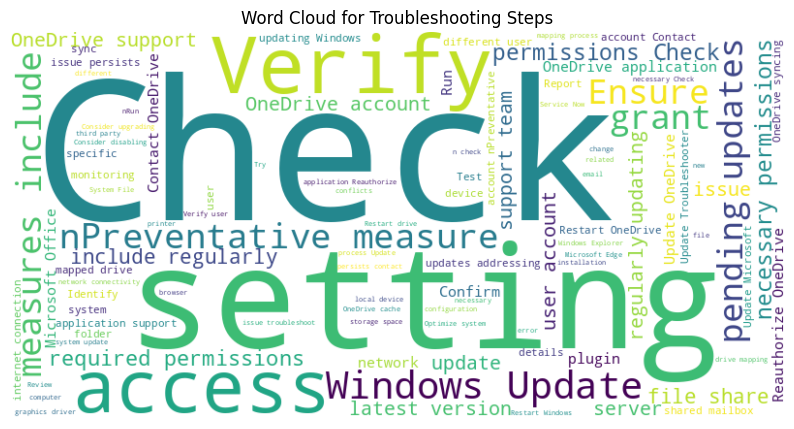

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Troubleshooting_Steps'].astype(str)))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Troubleshooting Steps')
plt.show()


In [24]:
df['Troubleshooting_Steps'] = df['Troubleshooting_Steps'].replace('N/A', np.nan)
df['Error_Message'].fillna('Unknown', inplace=True)

In [25]:
# Assuming your data is in a DataFrame named df
df['Troubleshooting_Steps'].fillna('Unknown', inplace=True)


In [26]:
# Assuming your data is in a DataFrame named df
shuffled_df = df.sample(frac=1, random_state=42)  # frac=1 means the entire DataFrame will be shuffled


In [27]:
shuffled_df = shuffled_df.reset_index(drop=True)


In [28]:
shuffled_df.head()

,Issue_Description,Error_Message,System_Specs,Troubleshooting_Steps
0,Mapped drive access is extremely slow during p...,Unknown,Unknown,Try accessing the drive during off-peak hours.
1,Encountering 'There was a problem connecting t...,SERVER_CONNECTION_ERROR,Linux Ubuntu 20.04,1. Verify server connection. 2. Restart drive ...
2,[TICKET ID] - New Support Ticket received - qu...,Unknown,Unknown,1. Examine the new support ticket regarding re...
3,"Despite having ample storage, OneDrive repeate...",STORAGE_FULL_ERROR,"Linux Ubuntu 20.04, 8 GB RAM, 256 GB SSD, AMD ...",1. Confirm available storage on OneDrive. 2. C...
4,Sound Issues in Video Playback,Unknown,Realtek High Definition Audio Windows 10 Home,check audio cable connections and speaker sett...


In [29]:
shuffled_df.to_csv("test2.csv")